In [ ]:
# 데이터 분석부터 먼저한다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_pre = pd.read_csv('wine.csv', header=None)
# 원본 데이터에서 샘플 데이터를 뽑아온다. frac=1는 100%를 불러온다.
df = df_pre.sample(frac=0.5)

print(df.head(5))

       0     1     2     3      4     5      6        7     8     9     10  \
5316  6.3  0.18  0.24   3.4  0.053  20.0  119.0  0.99373  3.11  0.52   9.2   
5210  6.8  0.14  0.18   1.4  0.047  30.0   90.0  0.99164  3.27  0.54  11.2   
3518  7.3  0.22  0.50  13.7  0.049  56.0  189.0  0.99940  3.24  0.66   9.0   
1622  7.6  0.67  0.14   1.5  0.074  25.0  168.0  0.99370  3.05  0.51   9.3   
2443  7.3  0.21  0.29   1.6  0.034  29.0  118.0  0.99170  3.30  0.50  11.0   

      11  12  
5316   6   0  
5210   6   0  
3518   6   0  
1622   5   0  
2443   8   0  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3248 entries, 5316 to 3138
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3248 non-null   float64
 1   1       3248 non-null   float64
 2   2       3248 non-null   float64
 3   3       3248 non-null   float64
 4   4       3248 non-null   float64
 5   5       3248 non-null   float64
 6   6       3248 non-null   float64
 7   7       3248 non-null   float64
 8   8       3248 non-null   float64
 9   9       3248 non-null   float64
 10  10      3248 non-null   float64
 11  11      3248 non-null   int64  
 12  12      3248 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 355.2 KB
None


In [ ]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12].astype(np.int16)


In [ ]:
from tensorflow import keras
import tensorflow as tf

# random 설정 초기화
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=200)

print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
17/17 [==============================] - 1s 3ms/step - loss: 0.8636 - accuracy: 0.7229
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8002
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3246 - accuracy: 0.8855
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.9138
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9224
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.9230
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9283
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2239 - accuracy: 0.9280
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9286
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9304
Epoch 11/

In [ ]:
model.save("my_model_wine.h5")

In [ ]:
del model

In [ ]:
model = keras.models.load_model("my_model_wine.h5")
model.evaluate(X, Y)

204/204 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9861


[0.04761360213160515, 0.9861474633216858]

In [ ]:
# 모델을 제대로 저장하려면?
# 모델 저장 경로를 지정한다. 폴더를 생성한다.
import os 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [ ]:
# 파일 형식을 지정한다.
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

# 콜백 함수 지정
# checkpoint의 monitor 옵션 종류는 val_loss, val_acc, acc, loss가 있다. 
checkpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                             monitor = 'val_loss', # 테스트셋 loss 수치
                                             verbose = 1,
                                             save_best_only=True)
# 학습을 하면서 loss가 최하일 때, 아래 메시지를 남기며, 모델을 저장한다.
# Epoch 4: val_loss improved from 0.06595 to 0.06573, saving model to ./model/04-0.0657.hdf5
model.fit(X, Y, validation_split=0.2, epochs = 200, 
          batch_size = 200, verbose = 1, callbacks = [checkpoint])

Epoch 1/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0399 - accuracy: 0.9800
Epoch 1: val_loss improved from inf to 0.06595, saving model to ./model/01-0.0660.hdf5
13/13 [==============================] - 0s 9ms/step - loss: 0.0403 - accuracy: 0.9861 - val_loss: 0.0660 - val_accuracy: 0.9785
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0217 - accuracy: 0.9900
Epoch 2: val_loss did not improve from 0.06595
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0743 - val_accuracy: 0.9769
Epoch 3/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1023 - accuracy: 0.9550
Epoch 3: val_loss did not improve from 0.06595
13/13 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9831 - val_loss: 0.0698 - val_accuracy: 0.9800
Epoch 4/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0283 - accuracy: 0.9900
Epoch 4: val_loss improved from 0.06595 to 0.06573, 

In [ ]:
# 그래프로 확인하기

model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

# 모델 실행
checkpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                             monitor = 'val_loss', # 테스트셋 loss 수치
                                             verbose = 1,
                                             save_best_only=True)

history = model.fit(X, Y, validation_split=0.2, epochs = 200, 
          batch_size = 200, verbose = 1, callbacks = [checkpoint])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
 1/13 [=>............................] - ETA: 12s - loss: 9.8055 - accuracy: 0.2450
Epoch 1: val_loss improved from inf to 3.24517, saving model to ./model/01-3.2452.hdf5
13/13

AttributeError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


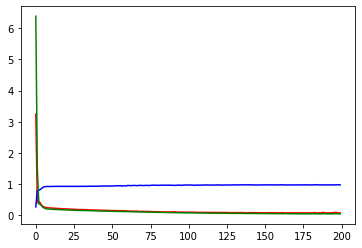

In [ ]:
print(history.history.keys())

y_loss = history.history['val_loss']
t_loss = history.history['loss']
y_acc = history.history['val_accuracy']

plt.plot(y_loss, c = 'r')
plt.plot(t_loss, c = 'g')
plt.plot(y_acc, c = 'b')

plt.show()

In [ ]:
#
df_pre.shape
df = df_pre
X = df.values[:, :-1]
Y = df.values[:, -1].astype(np.int16)
print(X.dtype)
print(Y.dtype)

float64
int16


In [ ]:
# 그래프로 확인하기

model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                390       
                                                                 
 dense_17 (Dense)            (None, 12)                372       
                                                                 
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 파일 형식을 지정한다.
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                             monitor = 'val_loss', # 테스트셋 loss 수치
                                             verbose = 1,
                                             save_best_only=True)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience = 3)

history = model.fit(X, Y, validation_split=0.3, epochs = 200, 
          batch_size = 500, verbose = 1, callbacks = [checkpoint, early_stopping])

Epoch 1/200
 1/10 [==>...........................] - ETA: 7s - loss: 5.9691 - accuracy: 0.6120
Epoch 1: val_loss improved from inf to 0.00015, saving model to ./model/01-0.0002.hdf5
10/10 [==============================] - 1s 38ms/step - loss: 4.8434 - accuracy: 0.6483 - val_loss: 1.5028e-04 - val_accuracy: 1.0000
Epoch 2/200
 1/10 [==>...........................] - ETA: 0s - loss: 3.4368 - accuracy: 0.6380
Epoch 2: val_loss did not improve from 0.00015
10/10 [==============================] - 0s 9ms/step - loss: 2.4427 - accuracy: 0.6483 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/200
 1/10 [==>...........................] - ETA: 0s - loss: 1.2799 - accuracy: 0.6580
Epoch 3: val_loss did not improve from 0.00015
10/10 [==============================] - 0s 10ms/step - loss: 0.8715 - accuracy: 0.6483 - val_loss: 0.1631 - val_accuracy: 1.0000
Epoch 4/200
 1/10 [==>...........................] - ETA: 0s - loss: 0.5123 - accuracy: 0.6420
Epoch 4: val_loss did not improve from 0.00015

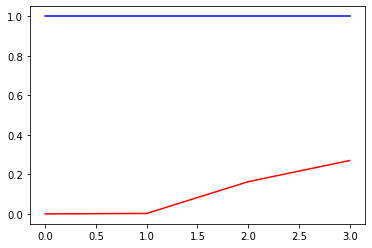

In [ ]:
val_loss = history.history["val_loss"]
val_acc = history.history["val_accuracy"]


plt.plot(val_loss, c = 'r')
plt.plot(val_acc, c = 'b')

plt.show()